1. load data and preprocess

In [24]:
from tensorflow import keras
from tensorflow.keras import layers

# load data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


In [25]:
x_train.shape

(60000, 28, 28)

2. normalize input data

In [26]:
# 0–255 → 0–1
x_train = x_train / 255.0
x_test = x_test / 255.0

4. model

In [27]:
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28)),
        layers.Flatten(),
        layers.Dense(216, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(10, activation="softmax")
    ]
)

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
    

5. train

In [28]:
history = model.fit(
    x_train,
    y_train,
    epochs=15,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=2,
)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

Epoch 1/15
938/938 - 3s - 3ms/step - accuracy: 0.8967 - loss: 0.3399 - val_accuracy: 0.9608 - val_loss: 0.1256
Epoch 2/15
938/938 - 2s - 2ms/step - accuracy: 0.9532 - loss: 0.1569 - val_accuracy: 0.9703 - val_loss: 0.0963
Epoch 3/15
938/938 - 2s - 2ms/step - accuracy: 0.9637 - loss: 0.1219 - val_accuracy: 0.9746 - val_loss: 0.0787
Epoch 4/15
938/938 - 2s - 2ms/step - accuracy: 0.9686 - loss: 0.1025 - val_accuracy: 0.9774 - val_loss: 0.0726
Epoch 5/15
938/938 - 2s - 2ms/step - accuracy: 0.9732 - loss: 0.0882 - val_accuracy: 0.9801 - val_loss: 0.0635
Epoch 6/15
938/938 - 2s - 2ms/step - accuracy: 0.9769 - loss: 0.0758 - val_accuracy: 0.9772 - val_loss: 0.0759
Epoch 7/15
938/938 - 2s - 2ms/step - accuracy: 0.9770 - loss: 0.0745 - val_accuracy: 0.9805 - val_loss: 0.0675
Epoch 8/15
938/938 - 2s - 2ms/step - accuracy: 0.9785 - loss: 0.0667 - val_accuracy: 0.9813 - val_loss: 0.0663
Epoch 9/15
938/938 - 2s - 2ms/step - accuracy: 0.9796 - loss: 0.0627 - val_accuracy: 0.9823 - val_loss: 0.0606
E

In [29]:
y_pred = model.predict(x_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step


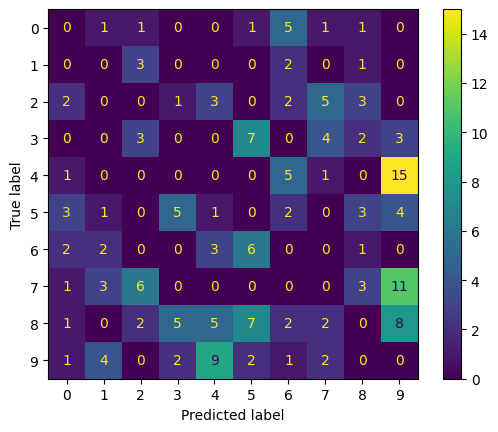

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

cm = confusion_matrix(y_test, y_pred, sample_weight= y_pred != y_test)
ConfusionMatrixDisplay(cm).plot()
plt.show()